# Credit Card Fraud Detection

# 1. Loading libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, cross_validate, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, matthews_corrcoef, classification_report, precision_recall_curve, roc_auc_score, accuracy_score, recall_score, precision_score, roc_curve, f1_score
from sklearn.neighbors import KDTree, KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.naive_bayes import GaussianNB, BernoulliNB, CategoricalNB

# 2. Loading data

In [2]:
credit = pd.read_csv('creditcard.csv')

In [3]:
print(credit.columns)
credit.head()

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# 3. Exploratory Data Analysis

In [4]:
print(credit.shape)

(284807, 31)


In [5]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
credit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


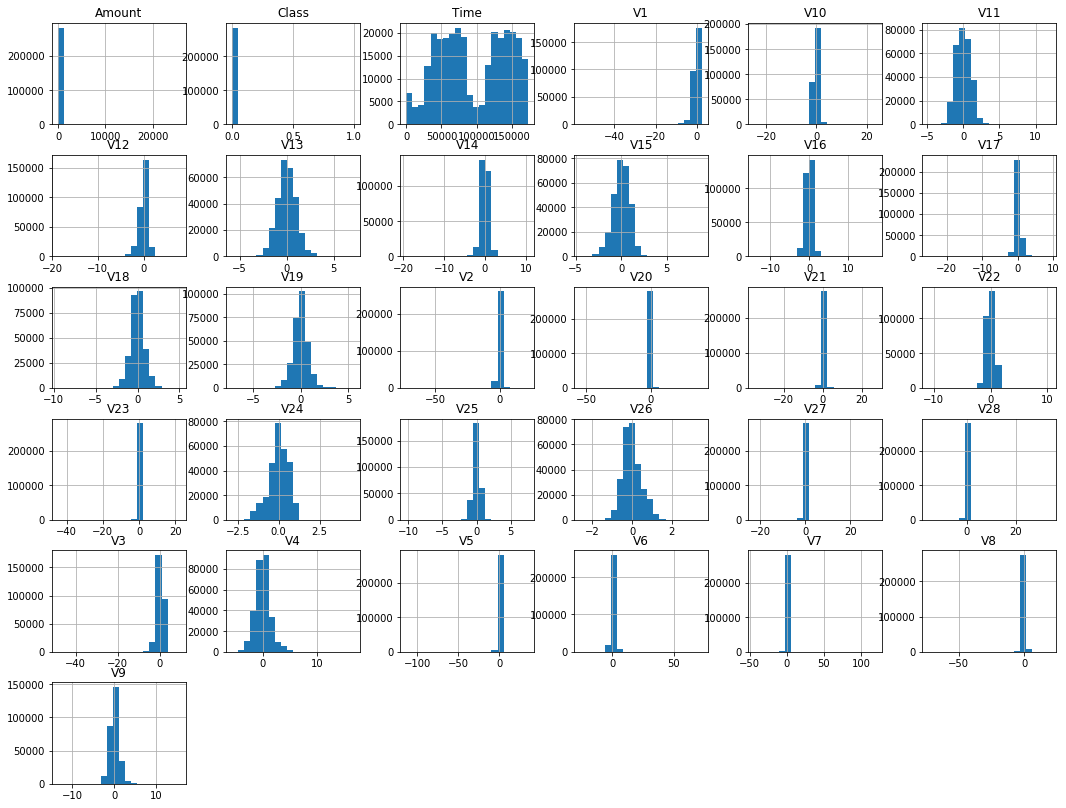

In [7]:
credit.hist(figsize=(18,14), bins=20) # Histogram to see the distirbution of each attribute
plt.show()

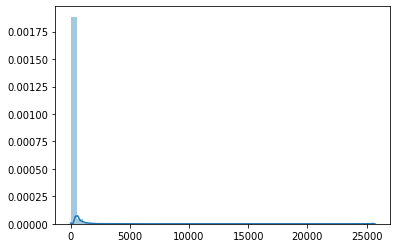

In [8]:
# distribution of Amount
amount = [credit['Amount'].values]
sns.distplot(amount)

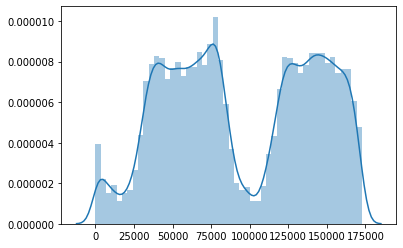

In [9]:
# distribution of Time
time = credit['Time'].values
sns.distplot(time)

In [10]:
#fraud vs. normal transactions 
counts = credit.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

There were 284315 non-fraudulent transactions (99.827%) and 492 fraudulent transactions (0.173%).


The classes are heavily skewed.


Notice how imbalanced is our original dataset! Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!

Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

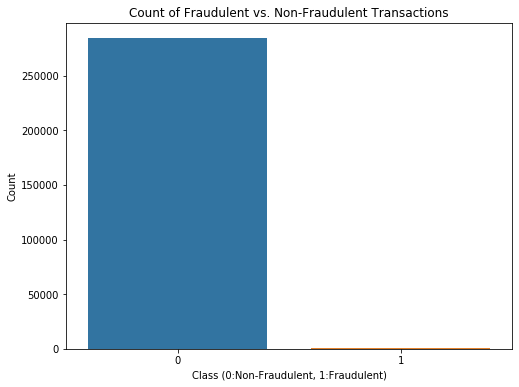

In [11]:
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [12]:
#Correlation matrix
corr_matrix = credit.corr()
# Mark to hide upper triangle
mask = np.zeros_like(corr_matrix, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

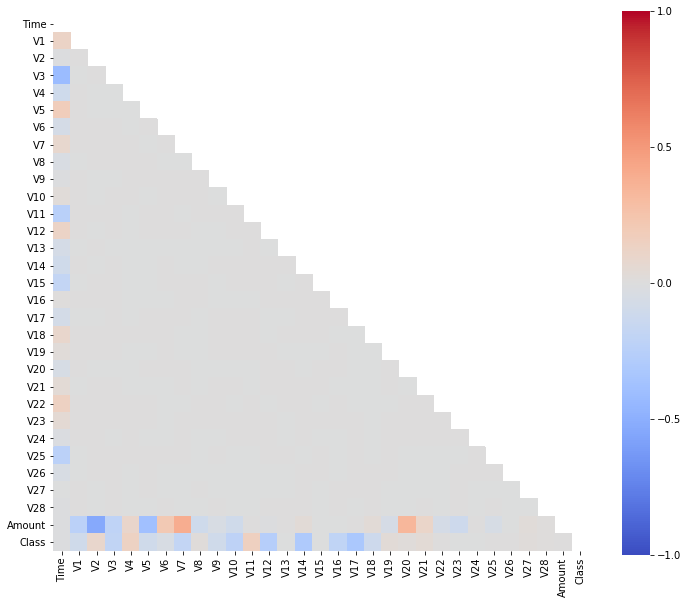

In [13]:
# Correlation heat map
fig, ax = plt.subplots(figsize = (12,10))

heatmap = sns.heatmap(corr_matrix, 
                      mask = mask, 
                      square = True, 
                      cmap = "coolwarm", 
                      cbar_kws = {"ticks": [-1, -0.5, 0, 0.5, 1]}, 
                      vmin = -1, 
                      vmax = 1)

plt.show()

# 4. Data preprocessing

In [14]:
print(credit.isnull().sum()) # Search missing values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In this phase, we will first scale the columns comprise of Time and Amount . Time and amount should be scaled as the other columns. On the other hand, we need to also create a sub sample of the dataframe in order to have an equal amount of Fraud and Non-Fraud cases, helping our algorithms better understand patterns that determines whether a transaction is a fraud or not.

In this scenario, our subsample will be a dataframe with a 50/50 ratio of fraud and non-fraud transactions. Meaning our sub-sample will have the same amount of fraud and non fraud transactions.

In the beginning of this notebook we saw that the original dataframe was heavily imbalanced! Using the original dataframe will cause the following issues:

   * Overfitting: Our classification models will assume that in most cases there are no frauds! What we want for our model is to be certain when a fraud occurs.
   * Wrong Correlations: Although we don't know what the "V" features stand for, it will be useful to understand how each of this features influence the result (Fraud or No Fraud) by having an imbalance dataframe we are not able to see the true correlations between the class and features.


Summary:

   * Scaled amount and scaled time are the columns with scaled values.
   * There are 492 cases of fraud in our dataset so we can randomly get 492 cases of non-fraud to create our new sub dataframe.
   * We concat the 492 cases of fraud and non fraud, creating a new sub-sample.


In [15]:
#Scaling Amount and Time
# RobustScaler is less prone to outliers.
rob_scaler = RobustScaler()

In [16]:
scaled_amount = rob_scaler.fit_transform(credit['Amount'].values.reshape(-1,1))
scaled_time = rob_scaler.fit_transform(credit['Time'].values.reshape(-1,1))

In [17]:
credit.drop(['Time','Amount'], axis=1, inplace=True)
credit.insert(0, 'scaled_amount', scaled_amount)
credit.insert(1, 'scaled_time', scaled_time)

In [18]:
credit.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


Before proceeding with the Random UnderSampling technique we have to separate the orginal dataframe. Why? for testing purposes, remember although we are splitting the data when implementing Random UnderSampling or OverSampling techniques, we want to test our models on the original testing set not on the testing set created by either of these techniques. The main goal is to fit the model either with the dataframes that were undersample and oversample (in order for our models to detect the patterns), and test it on the original testing set.

In [19]:
X = credit.drop('Class',axis=1)
y = credit["Class"]
X_data=X.values
y_data=y.values

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state = 0)

In [21]:
# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(y_train, return_counts=True)
test_unique_label, test_counts_label = np.unique(y_test, return_counts=True)
print('Label Distributions: \n')
print(train_counts_label/ len(y_train))
print(test_counts_label/ len(y_test))

Label Distributions: 

[0.99828392 0.00171608]
[0.99822689 0.00177311]


# 5. Balancing dataset

## Random Under-sampling


In this phase of the project we will implement "Random Under Sampling" which basically consists of removing data in order to have a more balanced dataset and thus avoiding our models to overfitting.

Steps:

   * The first thing we have to do is determine how imbalanced is our class (use "value_counts()" on the class column to determine the amount for each label)
   * Once we determine how many instances are considered fraud transactions (Fraud = "1") , we should bring the non-fraud transactions to the same amount as fraud transactions (assuming we want a 50/50 ratio), this will be equivalent to 492 cases of fraud and 492 cases of non-fraud transactions.
   * After implementing this technique, we have a sub-sample of our dataframe with a 50/50 ratio with regards to our classes. Then the next step we will implement is to shuffle the data to see if our models can maintain a certain accuracy everytime we run this script.


The main issue with "Random Under-Sampling" is that we run the risk that our classification models will not perform as accurate as we would like to since there is a great deal of information loss (bringing 492 non-fraud transaction from 284,315 non-fraud transaction)

In [22]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

credit = credit.sample(frac=1)

# amount of fraud classes 492 rows.
fraud = credit.loc[credit['Class'] == 1]
non_fraud = credit.loc[credit['Class'] == 0][:492]

normal_distributed = pd.concat([fraud, non_fraud])

# Shuffle dataframe rows
new_credit = normal_distributed.sample(frac=1, random_state=0)

new_credit.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
100623,7.364773,-0.201142,-0.758469,-0.045410,-0.168438,-1.313275,-1.901763,0.739433,3.071892,-0.483422,...,-0.032500,0.042619,0.397224,0.072229,-0.242276,0.560916,-0.540955,0.150606,-0.117140,1
79114,0.097813,-0.315112,-4.236230,-2.070593,-0.138865,-0.541508,0.571373,-0.775176,-0.077410,1.103152,...,-0.145190,-0.099108,-0.158200,1.411550,-0.231778,-0.094282,0.747944,0.704439,-1.009901,0
6641,-0.293440,-0.899012,0.857321,4.093912,-7.423894,7.380245,0.973366,-2.730762,-1.496497,0.543015,...,0.483303,0.375026,0.145400,0.240603,-0.234649,-1.004881,0.435832,0.618324,0.148469,1
25994,-0.289387,-0.597129,1.276934,0.443885,-0.129056,1.115250,-0.036173,-1.213864,0.496712,-0.309580,...,-0.207802,-0.006521,0.000466,-0.135182,0.384293,0.825257,-0.293711,-0.013174,0.009169,0
45396,2.243275,-0.497774,0.944425,-1.501404,0.840045,-0.441418,-1.422821,0.694531,-1.108939,0.340641,...,0.357404,0.158528,0.217528,-0.163833,-0.289244,0.244161,-0.227850,0.030385,0.037238,0


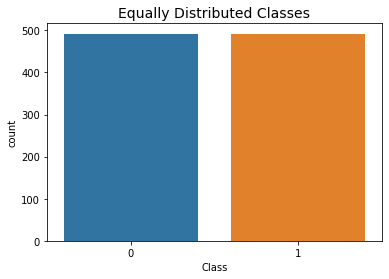

In [23]:
sns.countplot('Class', data=new_credit)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

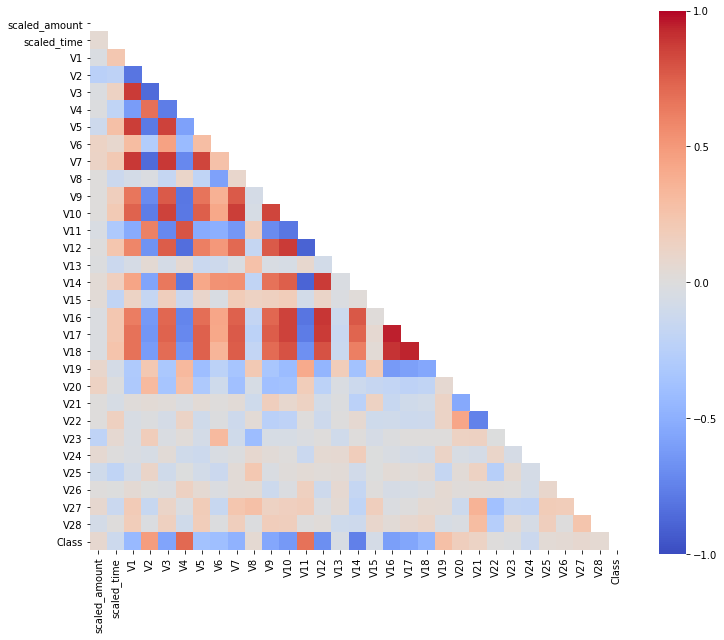

In [24]:
#Correlation matrix
corr_matrix = new_credit.corr()
# Mark to hide upper triangle
mask = np.zeros_like(corr_matrix, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Correlation heat map
fig, ax = plt.subplots(figsize = (12,10))

heatmap = sns.heatmap(corr_matrix, 
                      mask = mask, 
                      square = True, 
                      cmap = "coolwarm", 
                      cbar_kws = {"ticks": [-1, -0.5, 0, 0.5, 1]}, 
                      vmin = -1, 
                      vmax = 1)

plt.show()

Summary and Explanation:

   * Negative Correlations: V14, V12 and V10 are negatively correlated. Notice how the lower these values are, the more likely the end result will be a fraud transaction.
   * Positive Correlations: V2, V4, and V11 are positively correlated. Notice how the higher these values are, the more likely the end result will be a fraud transaction.
   * BoxPlots: We will use boxplots to have a better understanding of the distribution of these features in fradulent and non fradulent transactions.


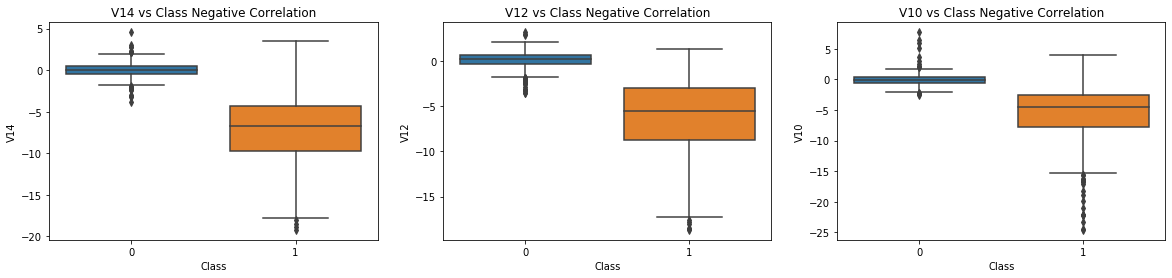

In [25]:
# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
fig, axes = plt.subplots(ncols=3, figsize=(20,4))


sns.boxplot(x="Class", y="V14", data=new_credit, ax=axes[0])
axes[0].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=new_credit, ax=axes[1])
axes[1].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=new_credit, ax=axes[2])
axes[2].set_title('V10 vs Class Negative Correlation')

plt.show()

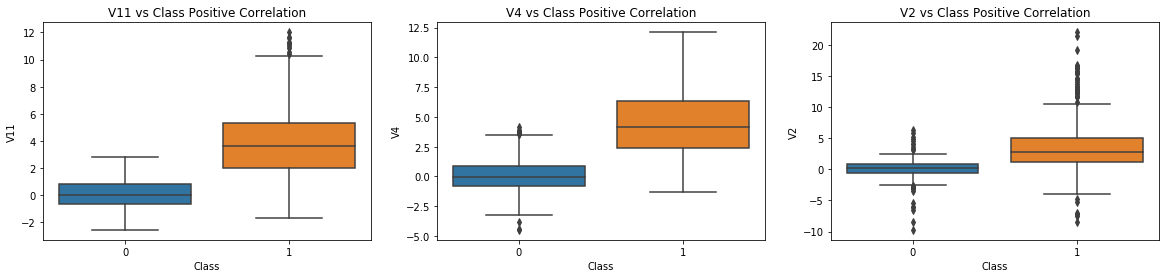

In [26]:
fig, axes = plt.subplots(ncols=3, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=new_credit, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_credit, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=new_credit,  ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')

plt.show()

### Outlier detection and removal

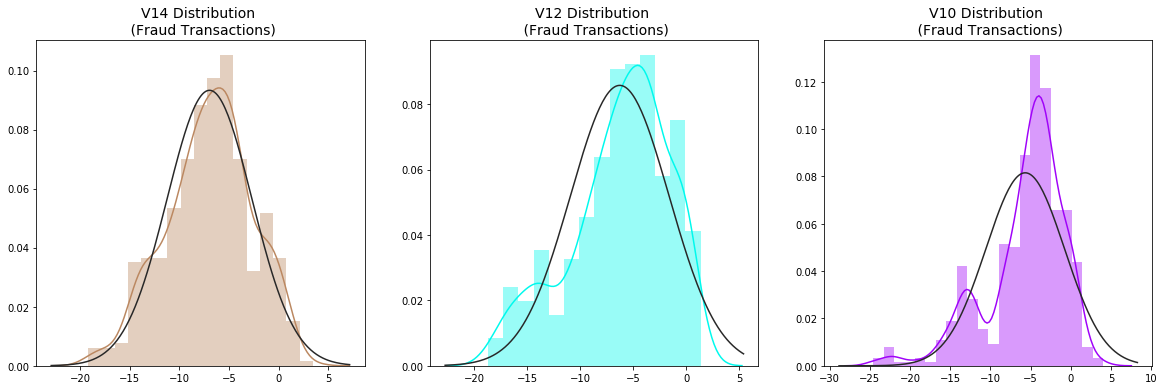

In [27]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = new_credit['V14'].loc[new_credit['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#BB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = new_credit['V12'].loc[new_credit['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#00F9ED')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = new_credit['V10'].loc[new_credit['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#A003F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

Removing outliers using Interquartile Range method

In [28]:
# V14 Removing Outliers (Highest Negative Correlated with Labels)
v14_fraud = new_credit['V14'].loc[new_credit['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
v14_iqr = q75 - q25

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
new_credit = new_credit.drop(new_credit[(new_credit['V14'] > v14_upper) | (new_credit['V14'] < v14_lower)].index)

# V12 removing outliers from fraud transactions
v12_fraud = new_credit['V12'].loc[new_credit['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off

outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
new_credit = new_credit.drop(new_credit[(new_credit['V12'] > v12_upper) | (new_credit['V12'] < v12_lower)].index)

# Removing outliers V10 Feature
v10_fraud = new_credit['V10'].loc[new_credit['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off

outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
new_credit = new_credit.drop(new_credit[(new_credit['V10'] > v10_upper) | (new_credit['V10'] < v10_lower)].index)

Now, the features have a more gaussian or normal distribution

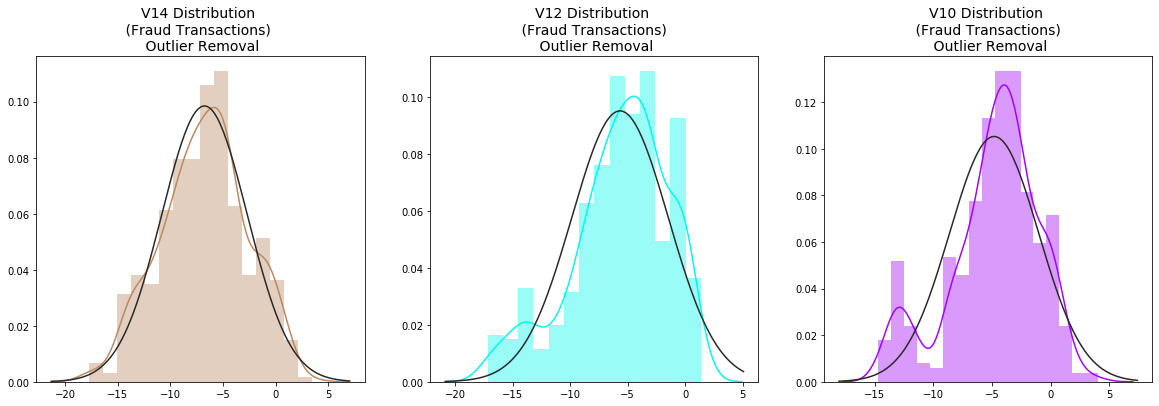

In [29]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = new_credit['V14'].loc[new_credit['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#BB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)  \n Outlier Removal', fontsize=14)

v12_fraud_dist = new_credit['V12'].loc[new_credit['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#00F9ED')
ax2.set_title('V12 Distribution \n (Fraud Transactions) \n Outlier Removal', fontsize=14)


v10_fraud_dist = new_credit['V10'].loc[new_credit['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#A003F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions) \n Outlier Removal', fontsize=14)

plt.show()

# 6. Selecting Models

In [30]:
# Undersampling before cross validating (prone to overfit)
X = new_credit.drop('Class', axis=1)
y = new_credit['Class']

In [31]:
# Our data is already scaled we should split our training and test sets
# This is used for undersampling.
undersampled_X_train, undersampled_X_test, undersampled_y_train, undersampled_y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [32]:
# Turn the values into an array for feeding the classification algorithms.
undersampled_X_train = undersampled_X_train.values
undersampled_X_test = undersampled_X_test.values
undersampled_y_train = undersampled_y_train.values
undersampled_y_test = undersampled_y_test.values

In [33]:
classifiers = {
    "LogisticRegression": LogisticRegression(random_state=0),
    "Support Vector Classifier": SVC(random_state=0),
    "KNearest": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(random_state=0),
    "Random Forest Classifier": RandomForestClassifier(random_state=0),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Gaussian Bayes": GaussianNB(), 
    "Bernoulli Naive Bayes": BernoulliNB()
}

In [34]:
scoring = ['accuracy', 'recall', 'precision', 'f1']
for key, classifier in classifiers.items():
    classifier.fit(undersampled_X_train, undersampled_y_train)
    training_score = cross_validate(classifier, undersampled_X_train, undersampled_y_train, cv=5, scoring = scoring)
    undersampled_y_pred = classifier.predict(undersampled_X_test)
    MCC = matthews_corrcoef(undersampled_y_test, undersampled_y_pred)
    print(classifier.__class__.__name__, "has a training score of", round(training_score['test_accuracy'].mean(), 2) * 100, "% accuracy,",
          round(training_score['test_recall'].mean(), 2)*100, "recall, and", 
          round(training_score['test_precision'].mean(), 2)*100, "precision, ",
          round(training_score['test_f1'].mean(), 2)*100, "f1 score, and ",
        MCC, "of Matthews Correlation Coefficient\n")

LogisticRegression has a training score of 92.0 % accuracy, 91.0 recall, and 94.0 precision,  92.0 f1 score, and  0.9267588804386554 of Matthews Correlation Coefficient

SVC has a training score of 92.0 % accuracy, 86.0 recall, and 97.0 precision,  91.0 f1 score, and  0.9065524029066461 of Matthews Correlation Coefficient

KNeighborsClassifier has a training score of 93.0 % accuracy, 88.0 recall, and 97.0 precision,  93.0 f1 score, and  0.9065524029066461 of Matthews Correlation Coefficient

DecisionTreeClassifier has a training score of 89.0 % accuracy, 90.0 recall, and 88.0 precision,  89.0 f1 score, and  0.8938202247191012 of Matthews Correlation Coefficient

RandomForestClassifier has a training score of 93.0 % accuracy, 89.0 recall, and 96.0 precision,  93.0 f1 score, and  0.937974669601518 of Matthews Correlation Coefficient

LinearDiscriminantAnalysis has a training score of 89.0 % accuracy, 81.0 recall, and 96.0 precision,  88.0 f1 score, and  0.8840947887560574 of Matthews Cor

### Hyperparameter tuning using GridSearchCV

Use GridSearchCV of the models with the highest accuracy score to find the best parameters.


In [35]:
# Logistic Regression (showing scores using 5-Fold cross validation and showing best estimator)
log_reg_params = {'penalty': ['l1','l2','elasticnet'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}


grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params, n_jobs=-1, scoring = scoring, refit='accuracy', cv=5)
grid_log_reg.fit(undersampled_X_train, undersampled_y_train)
# We automatically get the logistic regression with the best parameters.

best_log_reg = grid_log_reg.best_estimator_
scores = grid_log_reg.cv_results_
print(best_log_reg)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [36]:
#K-Neighbors
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params,  scoring = scoring, refit='accuracy', cv=5)
grid_knears.fit(undersampled_X_train, undersampled_y_train)
# KNears best estimator
best_knears_neighbors = grid_knears.best_estimator_
scores = grid_knears.cv_results_
print(best_knears_neighbors)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')


In [37]:
# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear'], 'gamma':['scale', 'auto']}
grid_svc = GridSearchCV(SVC(probability = True), svc_params, scoring = scoring, refit='accuracy', cv=5)
grid_svc.fit(undersampled_X_train, undersampled_y_train)

# SVC best estimator
best_svc = grid_svc.best_estimator_
scores = grid_svc.cv_results_
print(best_svc)

SVC(C=0.9, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [38]:
# Random Forest Classifier
forest_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_forest = GridSearchCV(RandomForestClassifier(), forest_params, scoring = scoring, refit='accuracy', cv=5)
grid_forest.fit(undersampled_X_train, undersampled_y_train)

# SVC best estimator
best_forest = grid_forest.best_estimator_
scores = grid_forest.cv_results_
print(best_forest)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


# 7. Evaluation of Best Models

In [39]:
best_classifiers = {
    "LogisticRegression": best_log_reg,
    "Support Vector Classifier": best_svc,
    "KNearest": best_knears_neighbors,
    "Random Forest Classifier": best_forest
}

scoring = ['accuracy', 'recall', 'precision', 'f1']
for key, best_classifier in best_classifiers.items():
    best_classifier.fit(undersampled_X_train, undersampled_y_train)
    training_score = cross_validate(best_classifier, undersampled_X_train, undersampled_y_train, cv=5, scoring = scoring)
    undersampled_y_pred = best_classifier.predict(undersampled_X_test)
    MCC = matthews_corrcoef(undersampled_y_test, undersampled_y_pred)
    print(best_classifier.__class__.__name__, "has a training score of", round(training_score['test_accuracy'].mean(), 2) * 100, "% accuracy,",
          round(training_score['test_recall'].mean(), 2)*100, "recall, ", 
          round(training_score['test_precision'].mean(), 2)*100, "precision, ", 
            round(training_score['test_f1'].mean(), 2)*100, "f1 score, and ",
         MCC, "of Matthews Correlation Coefficient\n")

LogisticRegression has a training score of 93.0 % accuracy, 89.0 recall,  97.0 precision,  93.0 f1 score, and  0.9156760377619784 of Matthews Correlation Coefficient

SVC has a training score of 94.0 % accuracy, 89.0 recall,  97.0 precision,  93.0 f1 score, and  0.9480909262799544 of Matthews Correlation Coefficient

KNeighborsClassifier has a training score of 93.0 % accuracy, 87.0 recall,  98.0 precision,  92.0 f1 score, and  0.9065524029066461 of Matthews Correlation Coefficient

RandomForestClassifier has a training score of 92.0 % accuracy, 85.0 recall,  99.0 precision,  91.0 f1 score, and  0.9081064099706092 of Matthews Correlation Coefficient



## Undersampled / Balanced data

In [40]:
log_reg_pred = cross_val_predict(best_log_reg, undersampled_X_train, undersampled_y_train, cv=5,
                             method="decision_function")

svc_pred = cross_val_predict(best_svc, undersampled_X_train, undersampled_y_train, cv=5,
                             method="decision_function")

knears_neighbors_predict = cross_val_predict(best_knears_neighbors, undersampled_X_train, undersampled_y_train, cv=5)

forest_pred = cross_val_predict(best_forest, undersampled_X_train, undersampled_y_train, cv=5)

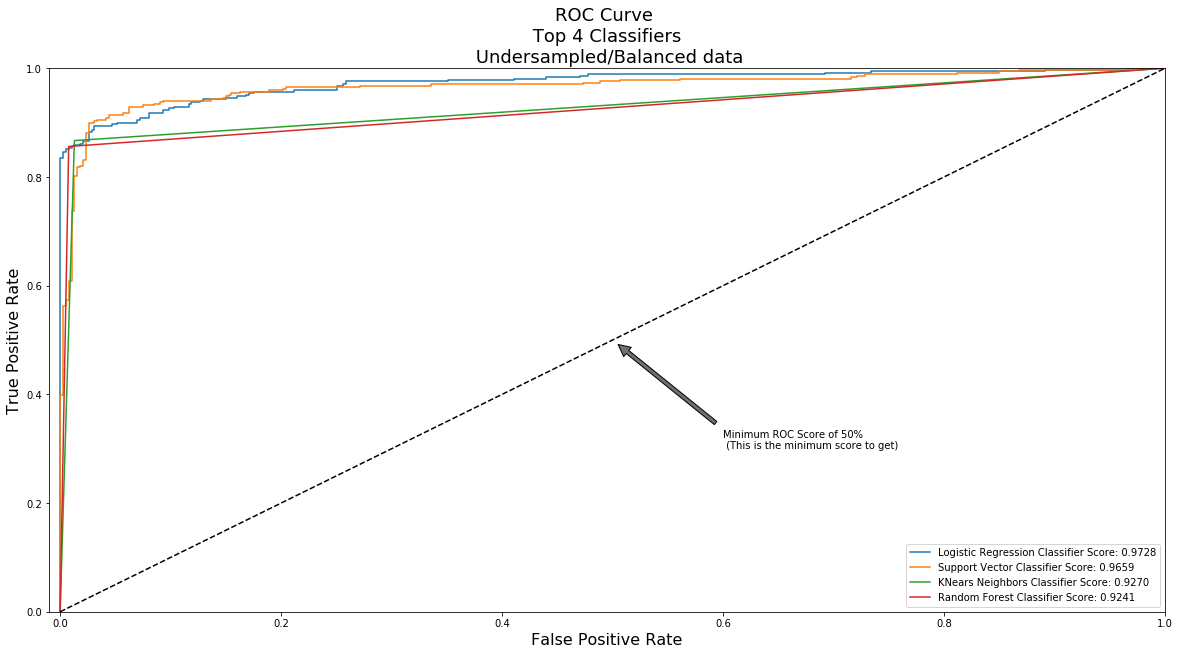

In [42]:
log_fpr, log_tpr, log_thresold = roc_curve(undersampled_y_train, log_reg_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(undersampled_y_train, svc_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(undersampled_y_train, knears_neighbors_predict)
forest_fpr, forest_tpr, forest_threshold = roc_curve(undersampled_y_train, forest_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, svc_fpr, svc_tpr, knear_fpr, knear_tpr, forest_fpr, forest_tpr):
    plt.figure(figsize=(20,10))
    plt.title('ROC Curve \n Top 4 Classifiers \n Undersampled/Balanced data', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: %.4f' % (roc_auc_score(undersampled_y_train, log_reg_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: %.4f' % (roc_auc_score(undersampled_y_train, svc_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: %.4f' % (roc_auc_score(undersampled_y_train, knears_neighbors_predict)))
    plt.plot(forest_fpr, forest_tpr, label='Random Forest Classifier Score: %.4f' % (roc_auc_score(undersampled_y_train, forest_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05))
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, svc_fpr, svc_tpr, knear_fpr, knear_tpr, forest_fpr, forest_tpr)
plt.show()

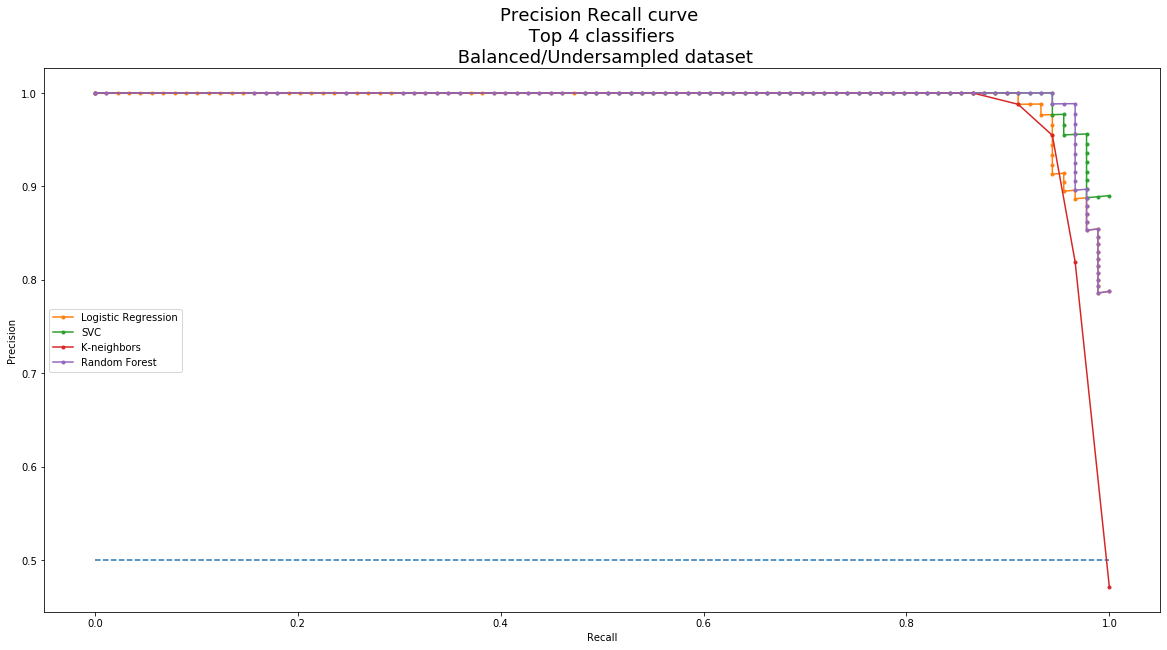

In [43]:
undersampled_probs = best_log_reg.predict_proba(undersampled_X_test)
undersampled_probs = undersampled_probs[:, 1]
log_reg_precision, log_reg_recall, log_reg_thresholds = precision_recall_curve(undersampled_y_test, undersampled_probs)

undersampled_probs = best_svc.predict_proba(undersampled_X_test)
undersampled_probs = undersampled_probs[:, 1]
svc_precision, svc_recall, svc_thresholds = precision_recall_curve(undersampled_y_test, undersampled_probs)

undersampled_probs = best_knears_neighbors.predict_proba(undersampled_X_test)
undersampled_probs = undersampled_probs[:, 1]
knears_precision, knears_recall, knears_thresholds = precision_recall_curve(undersampled_y_test, undersampled_probs)

undersampled_probs = best_forest.predict_proba(undersampled_X_test)
undersampled_probs = undersampled_probs[:, 1]
forest_precision, forest_recall, forest_thresholds = precision_recall_curve(undersampled_y_test, undersampled_probs)

# plot no skill
plt.figure(figsize=(20,10))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(log_reg_recall, log_reg_precision, marker='.', label='Logistic Regression')
plt.plot(svc_recall, svc_precision, marker='.', label='SVC')
plt.plot(knears_recall, knears_precision, marker='.', label='K-neighbors')
plt.plot(forest_recall, forest_precision, marker='.', label='Random Forest')
plt.title('Precision Recall curve \n Top 4 classifiers \n Balanced/Undersampled dataset', fontsize = 18)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [44]:
def confusion_matrix_model(model, y_test, X_test):
    """
    Function to give a format to the confusion matrix
    """
    cm = confusion_matrix(y_test, model.predict(X_test))
    col=["Predicted Non-Fraud","Predicted Fraud"]
    cm=pd.DataFrame(cm)
    cm.columns=["Predicted Non-Fraud","Predicted Fraud"]
    cm.index=["Actual Non-Fraud","Actual Fraud"]
    #cm[col]=np.around(cm[col].div(cm[col].sum(axis=1),axis=0),decimals=2) # For percentage
    return cm

In [45]:
# Logistic Regression

#Matthews Correlation Coefficient
undersampled_y_pred = best_log_reg.predict(undersampled_X_test)
MCC = matthews_corrcoef(undersampled_y_test, undersampled_y_pred)
print("Matthews Correlation Coefficient is %.2f" % MCC)

#Confusion Matrix
confusion_matrix_model(best_log_reg, undersampled_y_test, undersampled_X_test)

Matthews Correlation Coefficient is 0.92


,Predicted Non-Fraud,Predicted Fraud
Actual Non-Fraud,98,2
Actual Fraud,6,83


In [46]:
# Support Vector Classifier

#Matthews Correlation Coefficient
undersampled_y_pred = best_svc.predict(undersampled_X_test)
MCC = matthews_corrcoef(undersampled_y_test, undersampled_y_pred)
print("Matthews Correlation Coefficient is %.2f" % MCC)

#Confusion Matrix
confusion_matrix_model(best_svc, undersampled_y_test, undersampled_X_test)

Matthews Correlation Coefficient is 0.95


,Predicted Non-Fraud,Predicted Fraud
Actual Non-Fraud,100,0
Actual Fraud,5,84


In [47]:
# K Near Neighbors 

#Matthews Correlation Coefficient
undersampled_y_pred = best_knears_neighbors.predict(undersampled_X_test)
MCC = matthews_corrcoef(undersampled_y_test, undersampled_y_pred)
print("Matthews Correlation Coefficient is %.2f" % MCC)

#Confusion Matrix
confusion_matrix_model(best_knears_neighbors, undersampled_y_test, undersampled_X_test)

Matthews Correlation Coefficient is 0.91


,Predicted Non-Fraud,Predicted Fraud
Actual Non-Fraud,99,1
Actual Fraud,8,81


In [48]:
# Random Forest Classifier

#Matthews Correlation Coefficient
undersampled_y_pred = best_forest.predict(undersampled_X_test)
MCC = matthews_corrcoef(undersampled_y_test, undersampled_y_pred)
print("Matthews Correlation Coefficient is %.2f" % MCC)

#Confusion Matrix
confusion_matrix_model(best_forest, undersampled_y_test, undersampled_X_test)

Matthews Correlation Coefficient is 0.91


,Predicted Non-Fraud,Predicted Fraud
Actual Non-Fraud,100,0
Actual Fraud,9,80


## Original / Imbalanced Data

In [54]:
log_reg_pred = cross_val_predict(best_log_reg, X_train, y_train, cv=5,
                             method="decision_function")

In [55]:
svc_pred = cross_val_predict(best_svc, X_train, y_train, cv=5,
                             method="decision_function")

In [56]:
knears_neighbors_predict = cross_val_predict(best_knears_neighbors, X_train, y_train, cv=5)

In [57]:
forest_pred = cross_val_predict(best_forest, X_train, y_train, cv=5)

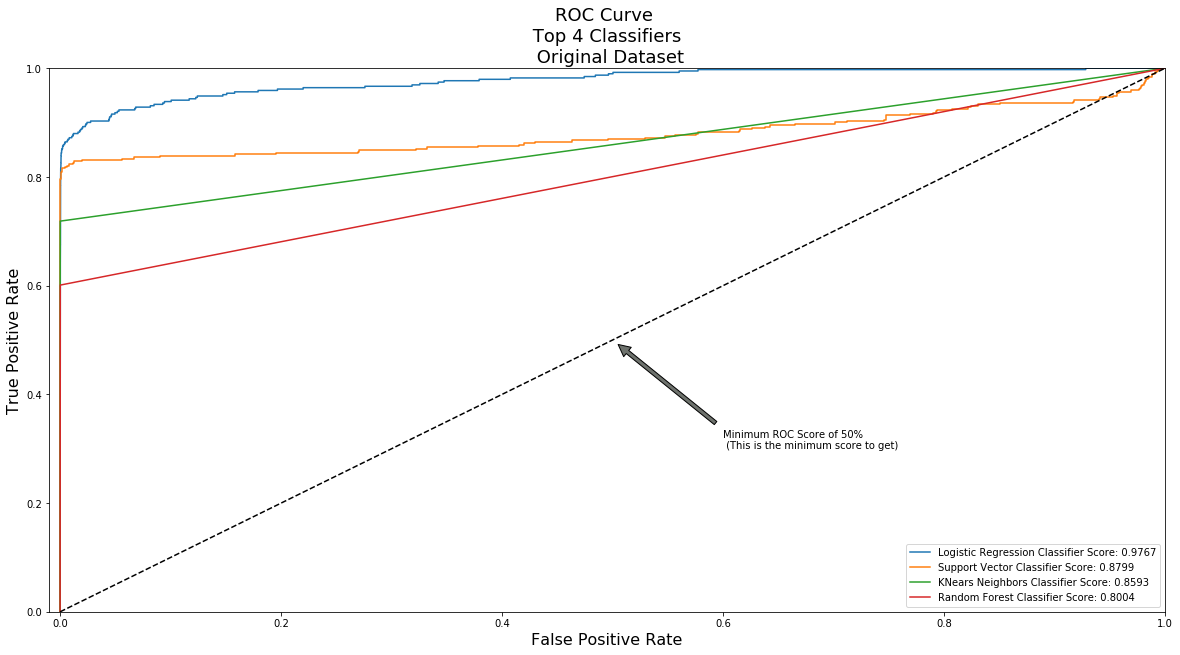

In [59]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_neighbors_predict)
forest_fpr, forest_tpr, forest_threshold = roc_curve(y_train, forest_pred)

def graph_roc_curve_multiple(log_fpr, log_tpr, svc_fpr, svc_tpr, knear_fpr, knear_tpr, forest_fpr, forest_tpr):
    plt.figure(figsize=(20,10))
    plt.title('ROC Curve \n Top 4 Classifiers \n Original Dataset', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: %.4f' % (roc_auc_score(y_train, log_reg_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: %.4f' % (roc_auc_score(y_train, svc_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: %.4f' % (roc_auc_score(y_train, knears_neighbors_predict)))
    plt.plot(forest_fpr, forest_tpr, label='Random Forest Classifier Score: %.4f' % (roc_auc_score(y_train, forest_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05))
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, svc_fpr, svc_tpr, knear_fpr, knear_tpr, forest_fpr, forest_tpr)
plt.show()

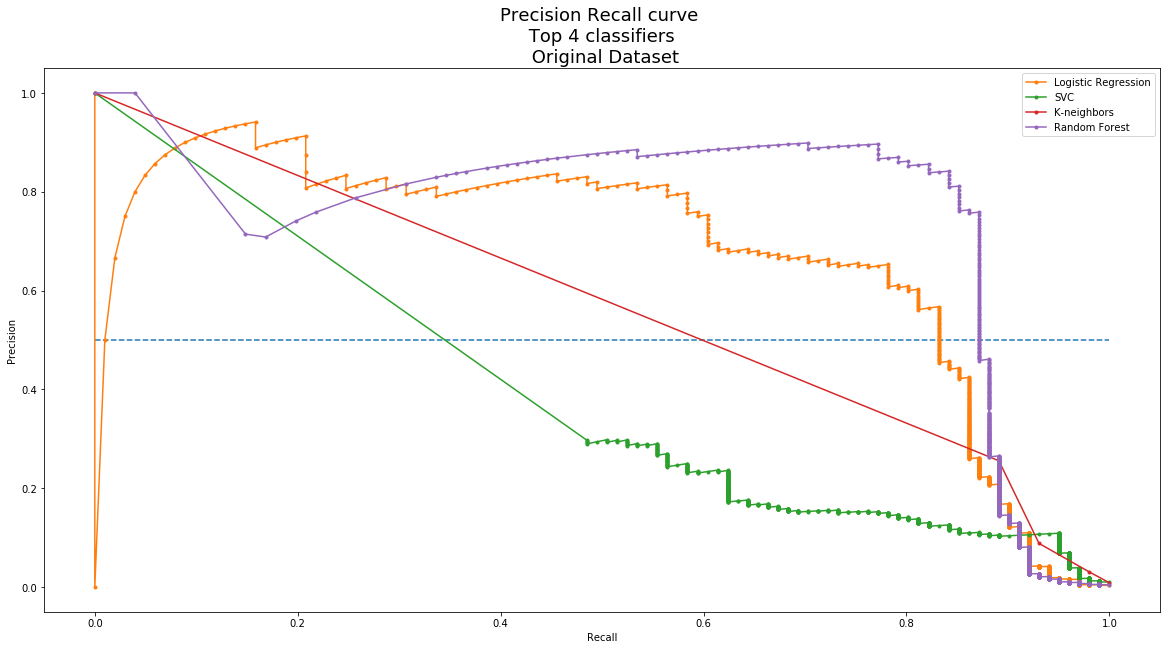

In [53]:
probs = best_log_reg.predict_proba(X_test)
probs = probs[:, 1]
log_reg_precision, log_reg_recall, log_reg_thresholds = precision_recall_curve(y_test, probs)

probs = best_svc.predict_proba(X_test)
probs = probs[:, 1]
svc_precision, svc_recall, svc_thresholds = precision_recall_curve(y_test, probs)

probs = best_knears_neighbors.predict_proba(X_test)
probs = probs[:, 1]
knears_precision, knears_recall, knears_thresholds = precision_recall_curve(y_test, probs)

probs = best_forest.predict_proba(X_test)
probs = probs[:, 1]
forest_precision, forest_recall, forest_thresholds = precision_recall_curve(y_test, probs)

# plot no skill
plt.figure(figsize=(20,10))
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(log_reg_recall, log_reg_precision, marker='.', label='Logistic Regression')
plt.plot(svc_recall, svc_precision, marker='.', label='SVC')
plt.plot(knears_recall, knears_precision, marker='.', label='K-neighbors')
plt.plot(forest_recall, forest_precision, marker='.', label='Random Forest')
plt.title('Precision Recall curve \n Top 4 classifiers \n Original Dataset', fontsize = 18)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [49]:
#Logistic Regression
#Matthews Correlation Coefficient
y_pred = best_log_reg.predict(X_test)
MCC = matthews_corrcoef(y_test, y_pred)
print("Matthews Correlation Coefficient is %.2f" % MCC)

#Confusion Matrix
confusion_matrix_model(best_log_reg, y_test, X_test)

Matthews Correlation Coefficient is 0.25


,Predicted Non-Fraud,Predicted Fraud
Actual Non-Fraud,55592,1269
Actual Fraud,8,93


In [50]:
#Support Vector Classifier
#Matthews Correlation Coefficient
y_pred = best_svc.predict(X_test)
MCC = matthews_corrcoef(y_test, y_pred)
print("Matthews Correlation Coefficient is %.2f" % MCC)

#Confusion Matrix
confusion_matrix_model(best_svc, y_test, X_test)

Matthews Correlation Coefficient is 0.24


,Predicted Non-Fraud,Predicted Fraud
Actual Non-Fraud,55423,1438
Actual Fraud,4,97


In [51]:
#K neighbors
#Matthews Correlation Coefficient
y_pred = best_knears_neighbors.predict(X_test)
MCC = matthews_corrcoef(y_test, y_pred)
print("Matthews Correlation Coefficient is %.2f" % MCC)

#Confusion Matrix
confusion_matrix_model(best_knears_neighbors, y_test, X_test)

Matthews Correlation Coefficient is 0.28


,Predicted Non-Fraud,Predicted Fraud
Actual Non-Fraud,55891,970
Actual Fraud,7,94


In [52]:
#Random Forest
#Matthews Correlation Coefficient
y_pred = best_forest.predict(X_test)
MCC = matthews_corrcoef(y_test, y_pred)
print("Matthews Correlation Coefficient is %.2f" % MCC)

#Confusion Matrix
confusion_matrix_model(best_forest, y_test, X_test)

Matthews Correlation Coefficient is 0.37


,Predicted Non-Fraud,Predicted Fraud
Actual Non-Fraud,56382,479
Actual Fraud,11,90


# References

https://towardsdatascience.com/detecting-credit-card-fraud-using-machine-learning-a3d83423d3b8
    
https://www.kaggle.com/aarondelgiudice/credit-card-fraud-classifier
    
https://medium.com/analytics-vidhya/credit-card-fraud-detection-in-python-using-scikit-learn-f9046a030f50

https://www.kaggle.com/joparga3/in-depth-skewed-data-classif-93-recall-acc-now

https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets/notebook

https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0118432

https://towardsdatascience.com/the-best-classification-metric-youve-never-heard-of-the-matthews-correlation-coefficient-3bf50a2f3e9a